### Boxplot

- 매일 투자한다고 가정 (일별 데이터)
- without loss event
- after returns(5~120, 5일간격) 구하기

In [215]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = '2014-01-01'
end_date = '2024-03-25'

data = yf.download('SPY', start = start_date, end = end_date)

data['Returns'] = data['Adj Close'].pct_change()
data['Cumulative Returns'] = (1 + data['Returns']).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


In [216]:
data.index = pd.to_datetime(
    data.index.strftime('%Y-%m-%d')
)

In [217]:
return_data = pd.DataFrame(index = data.index)

In [218]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5, 125, 5) :
    return_data[str(i) + 'days_return'] = (data['Adj Close'].shift(-i) - data['Adj Close']) / data['Adj Close'].shift(-i)

In [219]:
return_data

,5days_return,10days_return,15days_return,20days_return,25days_return,30days_return,35days_return,40days_return,45days_return,50days_return,...,75days_return,80days_return,85days_return,90days_return,95days_return,100days_return,105days_return,110days_return,115days_return,120days_return
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.003921,0.008134,-0.022528,-0.026602,-0.018032,0.005977,0.010762,0.011136,0.027849,0.018301,...,0.030729,0.030007,0.024969,0.041292,0.028973,0.048405,0.057321,0.065687,0.072067,0.073281
2014-01-03,0.006788,0.004084,-0.027414,-0.050066,-0.015999,0.007327,0.010550,0.025003,0.023180,0.025418,...,0.028614,0.033050,0.030837,0.036886,0.037243,0.053457,0.063583,0.059180,0.073258,0.072769
2014-01-06,-0.003687,0.009882,-0.018373,-0.039740,-0.002088,0.003606,0.013471,0.028709,0.026271,0.023037,...,0.033388,0.035954,0.032616,0.031170,0.042362,0.057719,0.070741,0.064758,0.077816,0.077250
2014-01-07,0.001034,0.004449,-0.034564,-0.047440,-0.007744,0.003368,0.012593,0.024976,0.009180,0.022743,...,0.019412,0.028641,0.028124,0.028589,0.040327,0.053013,0.065989,0.059788,0.071867,0.071109
2014-01-08,0.006174,-0.003994,-0.023936,-0.034032,-0.002787,0.002012,0.014869,0.025178,0.006174,0.018724,...,0.022295,0.030285,0.037286,0.031930,0.045982,0.052315,0.065882,0.062190,0.066039,0.077083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


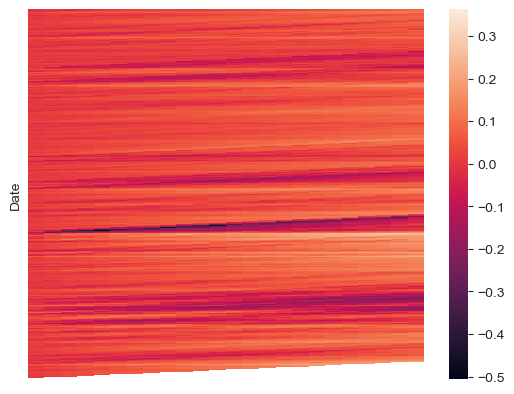

In [220]:
import seaborn as sns
sns.heatmap(return_data)
plt.grid(False)
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.show()

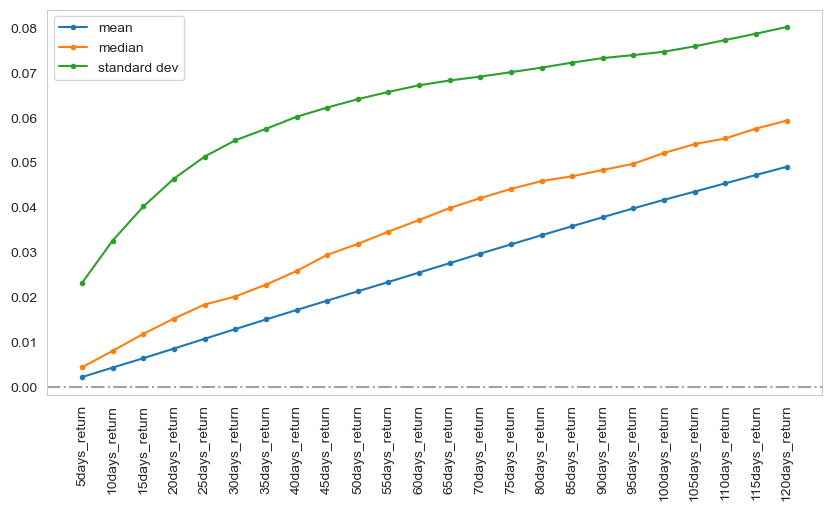

In [221]:
plt.figure(figsize = (10, 5))
plt.plot(
    return_data.mean(axis = 0), label = 'mean',
    marker = '.'
)
plt.plot(
    return_data.median(axis = 0), label = 'median',
    marker = '.'
)
plt.plot(return_data.std(axis = 0), label = 'standard dev', marker = '.')
plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

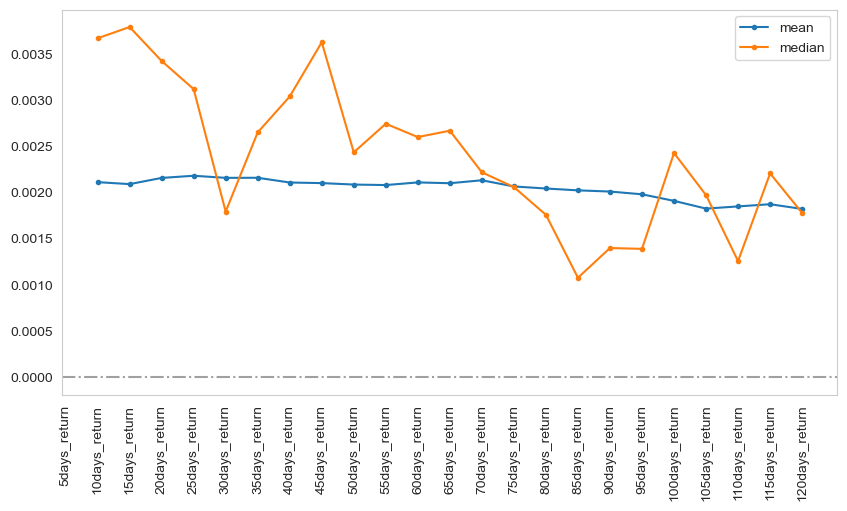

In [222]:
plt.figure(figsize = (10, 5))
plt.plot(
    return_data.mean(axis = 0).diff(), label = 'mean', marker = '.'
)
plt.plot(
    return_data.median(axis = 0).diff(), label = 'median', marker = '.'
)
#plt.plot(return_data.std(axis = 0).diff(), label = 'standard dev')
plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

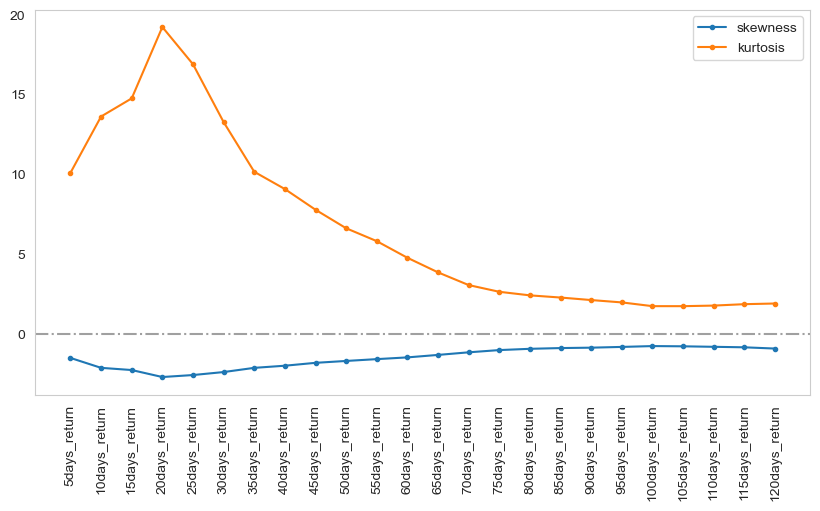

In [223]:
plt.figure(figsize = (10, 5))
plt.plot(return_data.skew(axis = 0), label = 'skewness', marker = '.')
plt.plot(return_data.kurt(axis = 0), label = 'kurtosis', marker = '.')
plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

In [224]:
def superskew(data):
    mean = np.mean(data)
    moment5 = np.mean((data - mean) ** 5)
    moment3 = np.mean((data - mean) ** 3)
    moment2 = np.mean((data - mean) ** 2)
    gamma5 = (moment5 / (moment3 * moment2)) - 10
    
    return gamma5

def superkurto(data):
    mean = np.mean(data)
    moment6 = np.mean((data - mean) ** 6)
    moment2 = np.mean((data - mean) ** 2)
    gamma6 = (moment6 / (moment2 ** 3)) - 15
    
    return gamma6

def hyperskew(data) :
    mean = np.mean(data)
    moment7 = np.mean((data - mean) ** 7)
    moment3 = np.mean((data - mean) ** 3)
    moment2 = np.mean((data - mean) ** 2)
    gamma7 = (moment7 / (moment3 * (moment2 ** 2))) - 105
    
    return gamma7

def hyperkurto(data) :
    mean = np.mean(data)
    moment8 = np.mean((data - mean) ** 8)
    moment2 = np.mean((data - mean) ** 2)
    gamma8 = (moment8 / (moment2 ** 4)) - 105
    
    return gamma8 

In [225]:
superskewness = []
for i in return_data.columns :
    superskewness.append(superskew(return_data[i]))

In [226]:
superkurtosis = []
for i in return_data.columns :
    superkurtosis.append(superkurto(return_data[i]))

In [227]:
hyperskewness = []
for i in return_data.columns :
    hyperskewness.append(hyperskew(return_data[i]))

In [228]:
hyperkurtosis = []
for i in return_data.columns :
    hyperkurtosis.append(hyperkurto(return_data[i]))

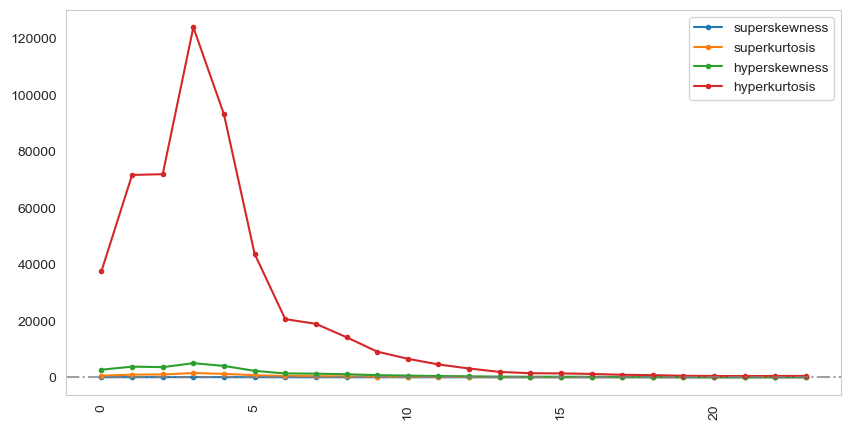

In [229]:
plt.figure(figsize = (10, 5))
plt.plot(superskewness, label = 'superskewness', marker = '.')
plt.plot(superkurtosis, label = 'superkurtosis', marker = '.')
plt.plot(hyperskewness, label = 'hyperskewness', marker = '.')
plt.plot(hyperkurtosis, label = 'hyperkurtosis', marker = '.')

plt.grid(False)
plt.legend()
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.show()

In [232]:
days = [i for i in range(5, 125, 5)]

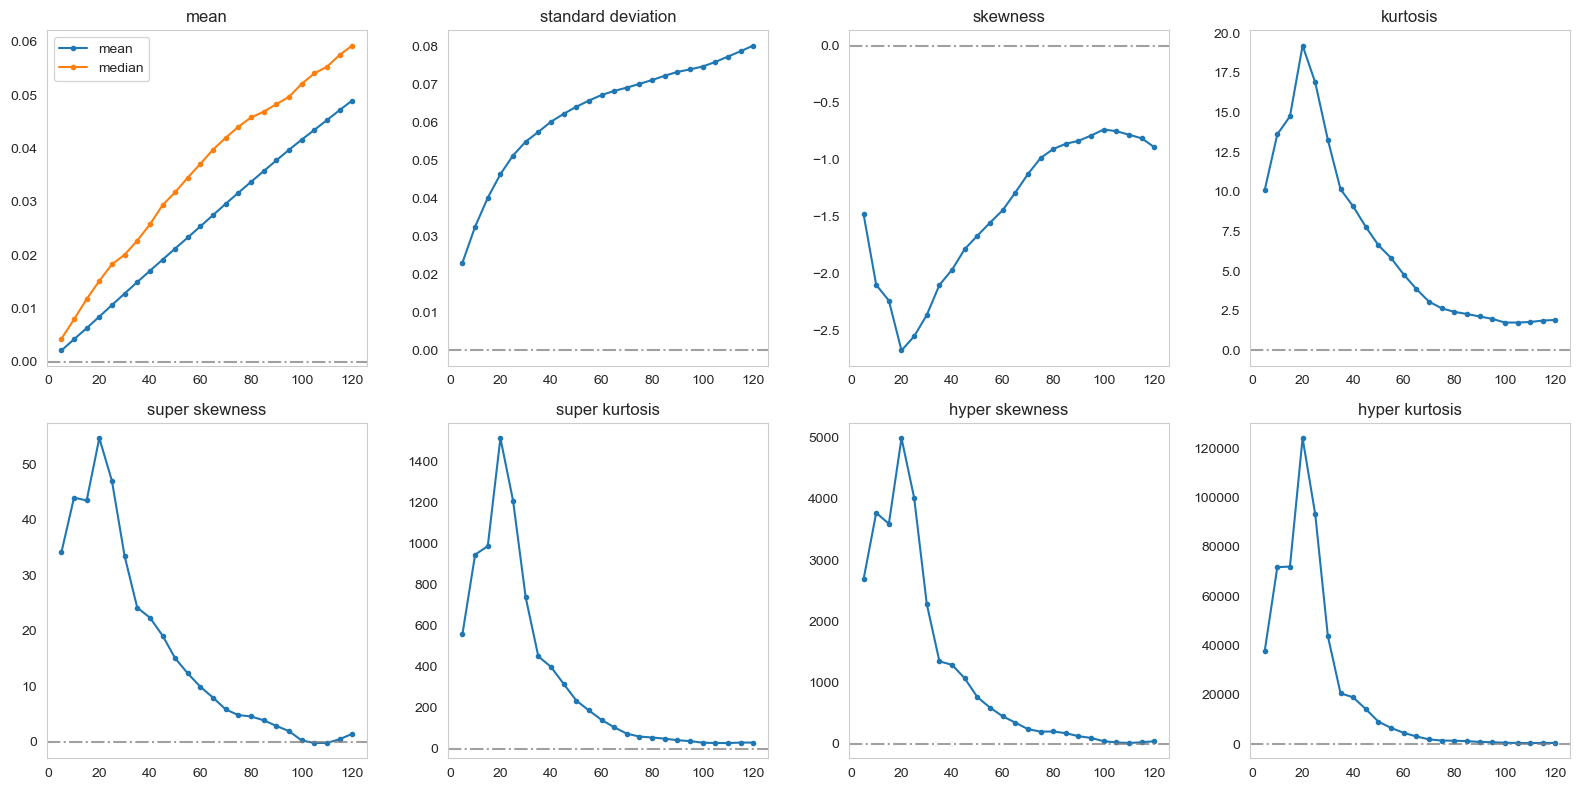

In [233]:
plt.figure(figsize = (16, 8))
plt.subplot(2, 4, 1)
plt.plot(
    days,
    return_data.mean(axis = 0), label = 'mean',
    marker = '.'
)
plt.plot(
    days,
    return_data.median(axis = 0), label = 'median',
    marker = '.'
)
plt.legend()
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('mean')

plt.subplot(2, 4, 2)
plt.plot(
    days,
    return_data.std(axis = 0), label = 'std',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('standard deviation')

plt.subplot(2, 4, 3)
plt.plot(
    days,
    return_data.skew(axis = 0), label = 'skew',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('skewness')

plt.subplot(2, 4, 4)
plt.plot(
    days,
    return_data.kurt(axis = 0), label = 'kurt',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('kurtosis')

plt.subplot(2, 4, 5)
plt.plot(
    days,
    superskewness, label = 'superskew',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('super skewness')

plt.subplot(2, 4, 6)
plt.plot(
    days,
    superkurtosis, label = 'superkurto',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('super kurtosis')

plt.subplot(2, 4, 7)
plt.plot(
    days,
    hyperskewness, label = 'hyperskew',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('hyper skewness')

plt.subplot(2, 4, 8)
plt.plot(
    days,
    hyperkurtosis, label = 'hyperkurto',
    marker = '.'
)
plt.grid(False)
plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
plt.title('hyper kurtosis')

plt.tight_layout()

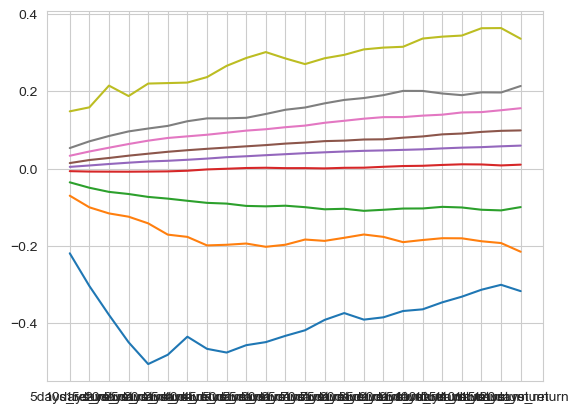

In [245]:
plt.plot(return_data.quantile([0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0]).T)

In [249]:
return_data.quantile([0.25]).T

,0.25
5days_return,-0.006701
10days_return,-0.007748
15days_return,-0.007972
20days_return,-0.008111
25days_return,-0.007775
30days_return,-0.007247
35days_return,-0.005590
40days_return,-0.002225
45days_return,-0.000486
50days_return,0.001416


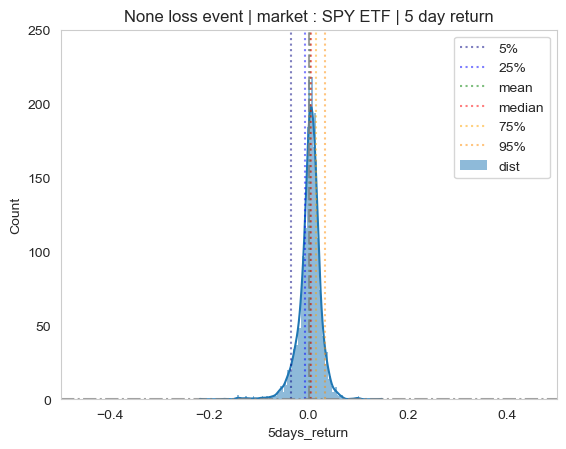

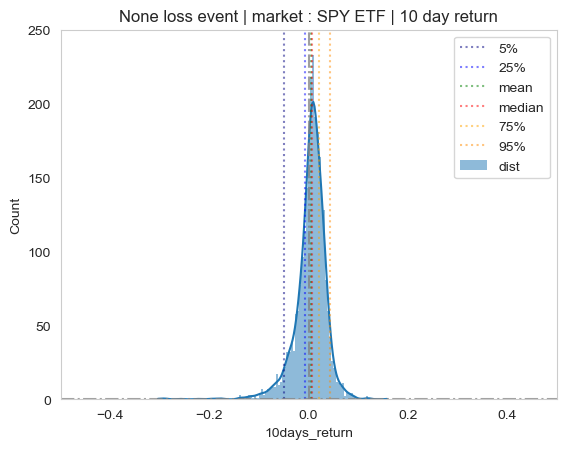

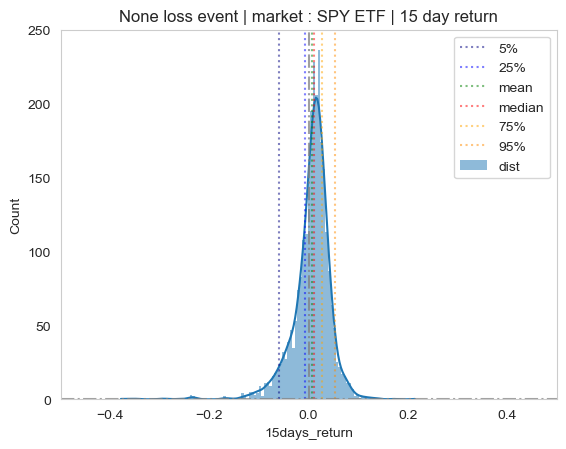

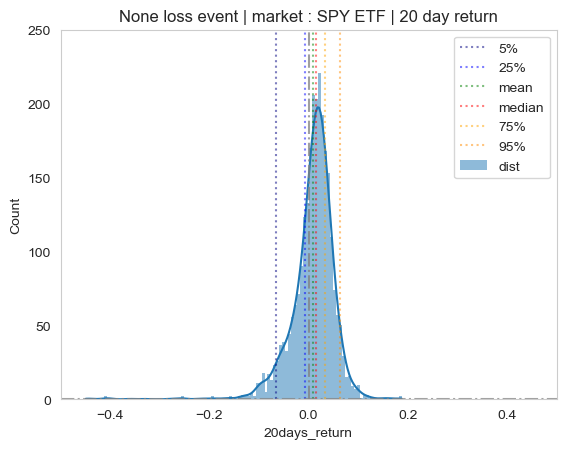

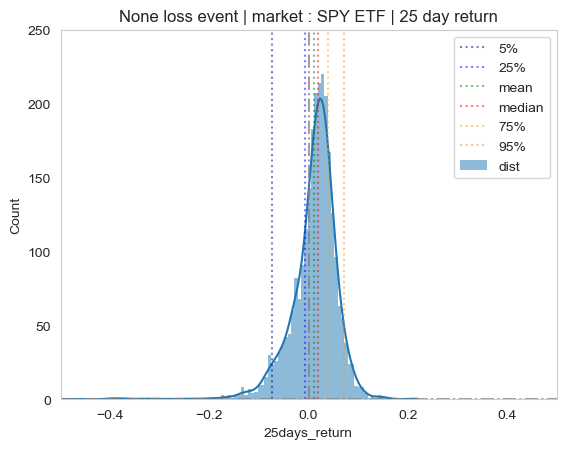

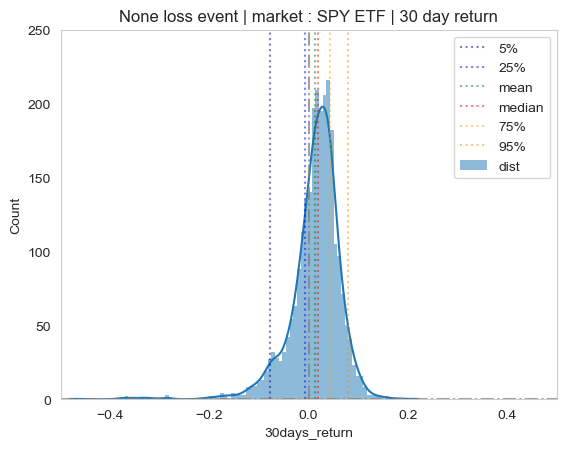

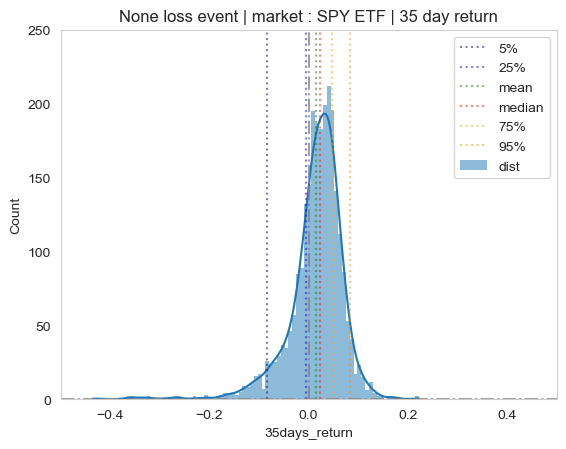

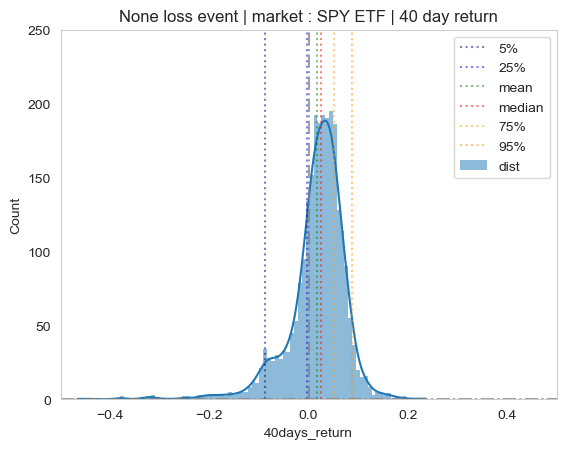

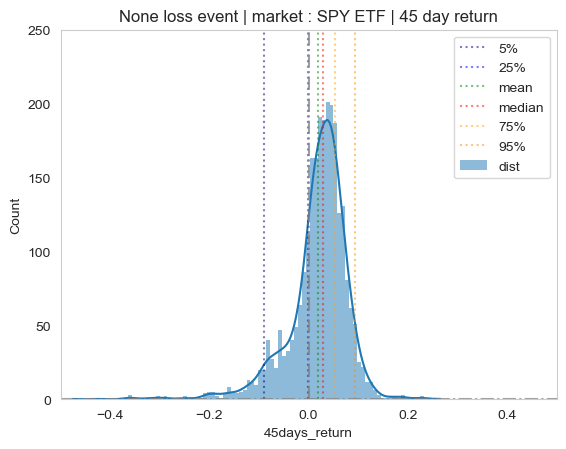

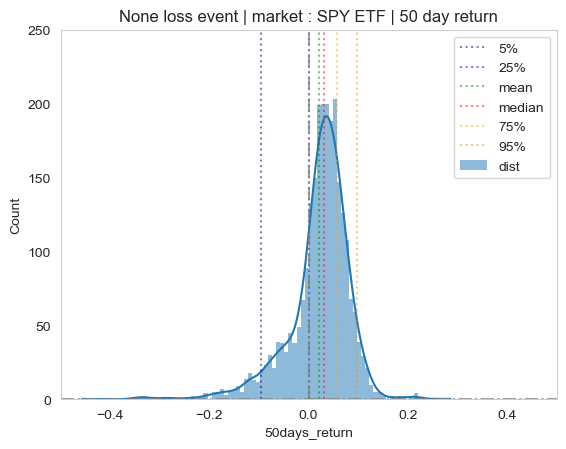

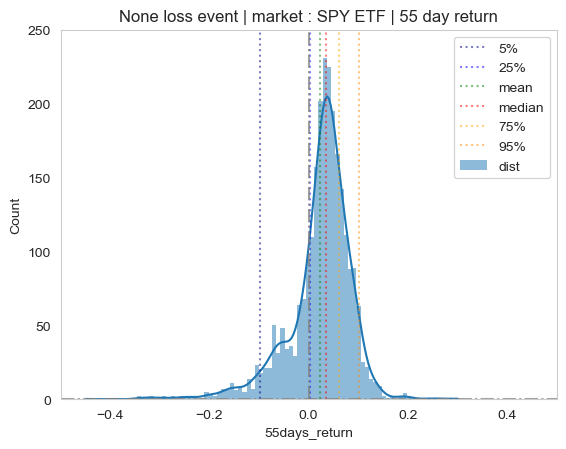

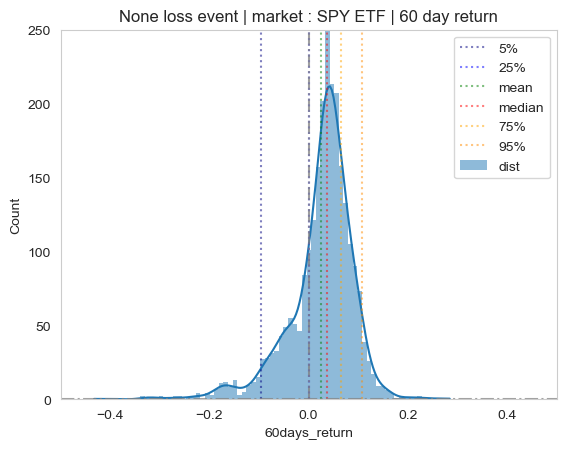

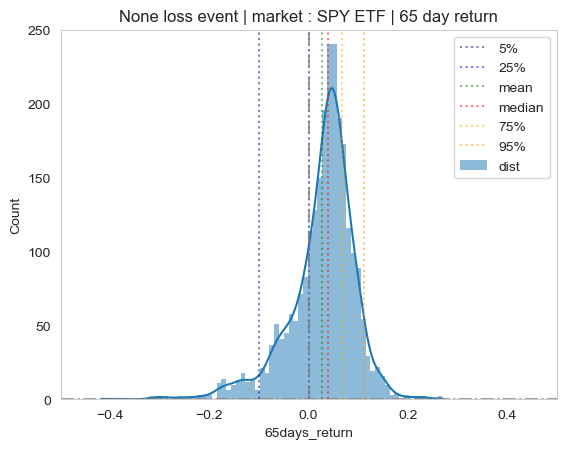

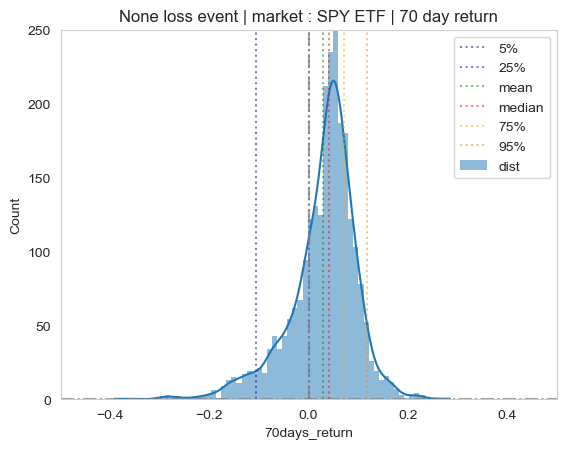

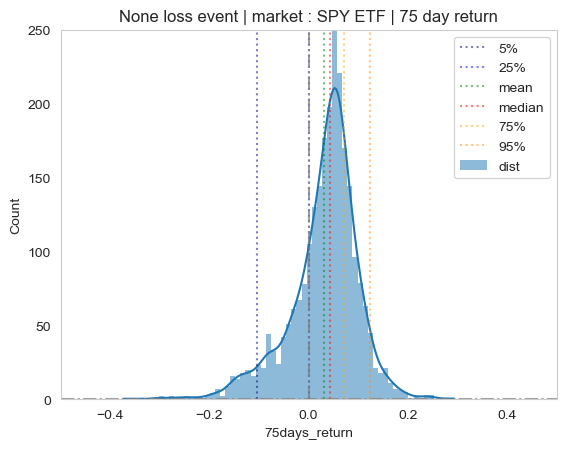

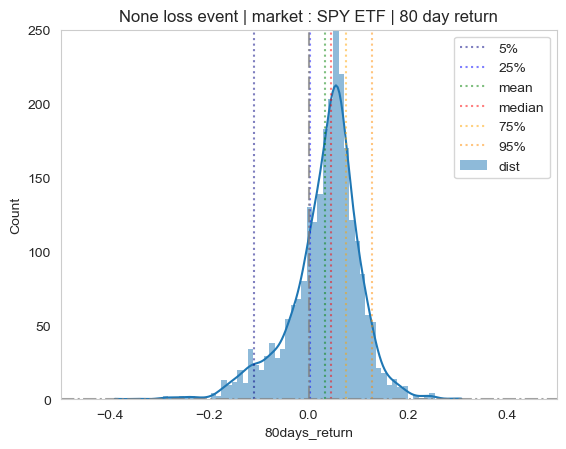

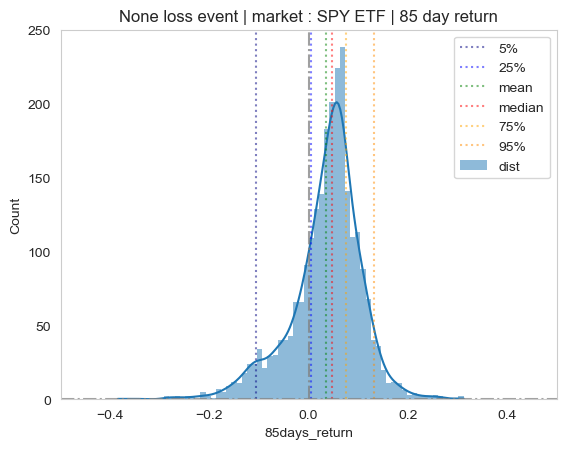

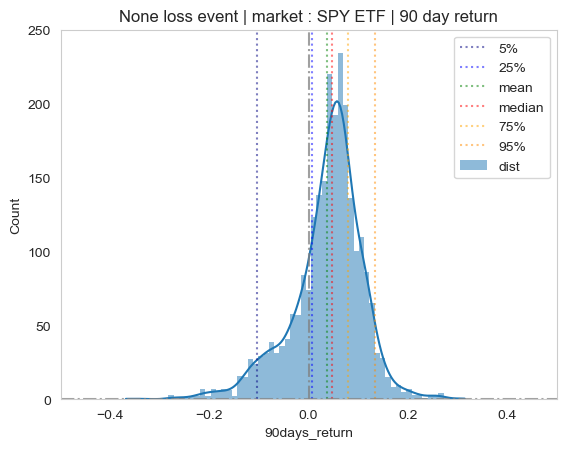

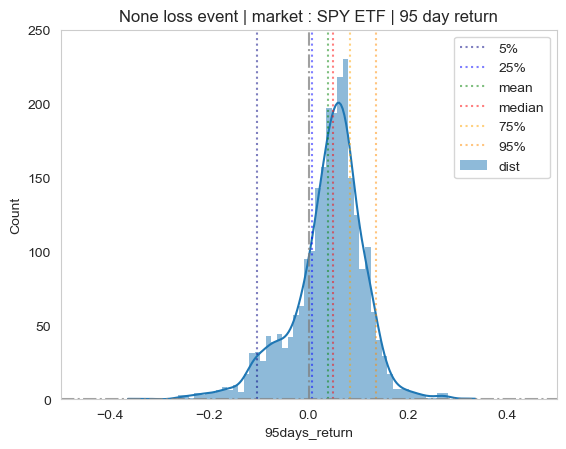

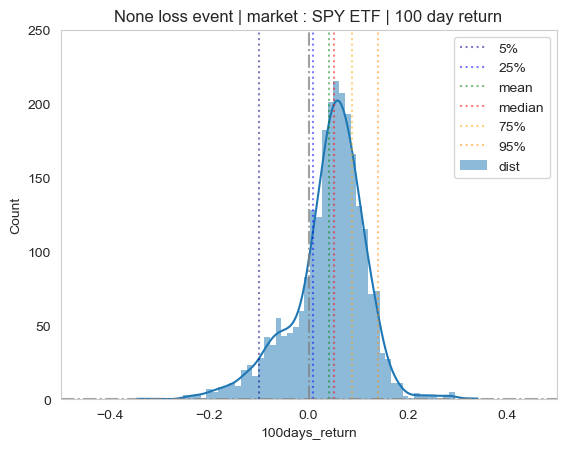

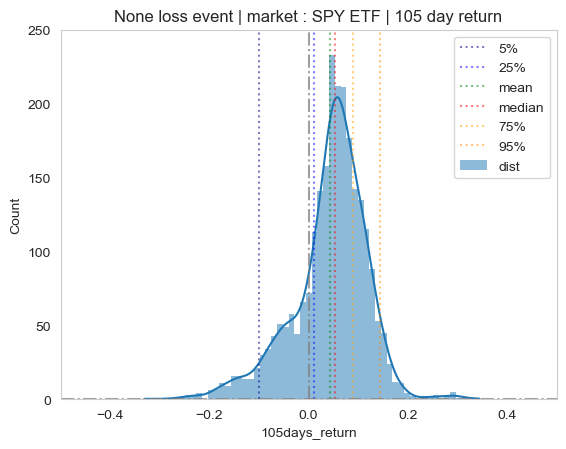

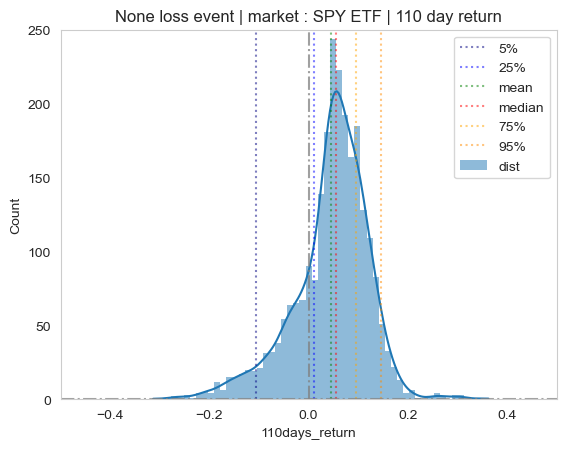

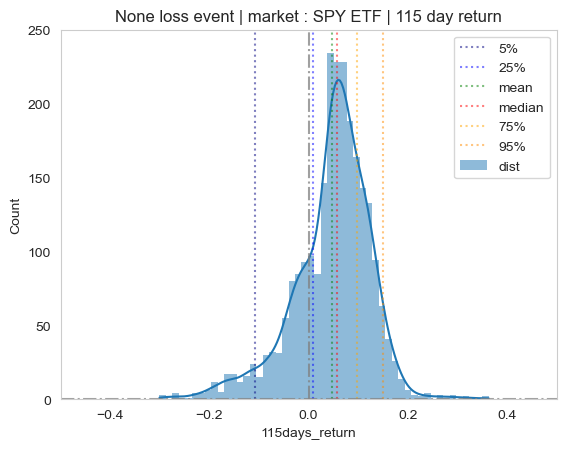

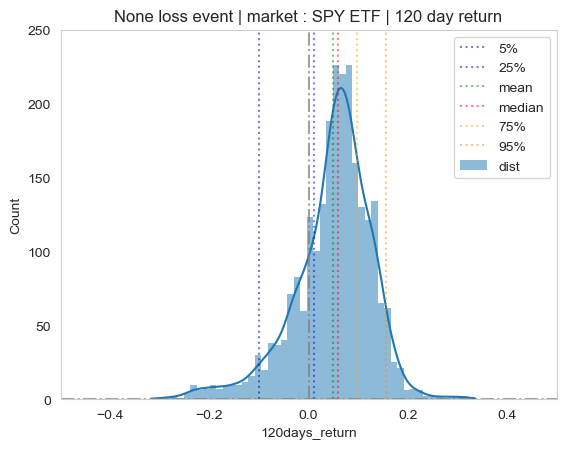

In [252]:
for i in days :
    sns.histplot(return_data[f'{i}days_return'], kde = True, edgecolor = 'none', label = 'dist')
    plt.axvline(return_data[f'{i}days_return'].quantile([0.05]).T.values, color = 'navy', ls = ':', alpha = 0.5, label = '5%')
    plt.axvline(return_data[f'{i}days_return'].quantile([0.25]).T.values, color = 'blue', ls = ':', alpha = 0.5, label = '25%')
    plt.axvline(return_data[f'{i}days_return'].mean(), color = 'green', alpha = 0.5, label = 'mean', ls = ':')
    plt.axvline(return_data[f'{i}days_return'].median(), color = 'red', alpha = 0.5, label = 'median', ls = ':')
    plt.axvline(return_data[f'{i}days_return'].quantile([0.75]).T.values, color = 'orange', ls = ':', alpha = 0.5, label = '75%')
    plt.axvline(return_data[f'{i}days_return'].quantile([0.95]).T.values, color = 'darkorange', ls = ':', alpha = 0.5, label = '95%')
    plt.axvline(0, color = 'gray', ls = '-.', alpha = 0.75)
    plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
    plt.legend()
    plt.grid(False)
    plt.xlim([-0.5, 0.5])
    plt.ylim([0, 250])
    plt.title(f'None loss event | market : SPY ETF | {i} day return')
    filename = f'./figure/None_loss_event_distribution_day{i}_return.png'
    plt.savefig(filename, dpi = 300, bbox_inches='tight')
    plt.show()

In [ ]:
plt.scatter

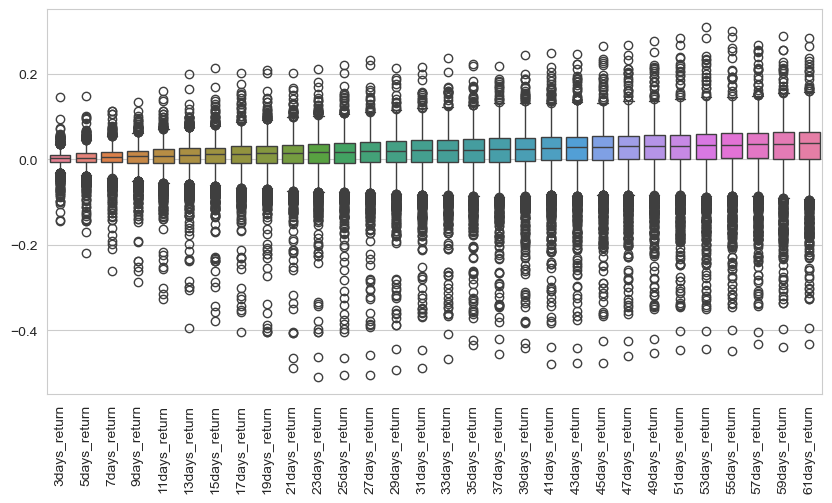

In [153]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = return_data)
plt.xticks(rotation = 90)
plt.show()

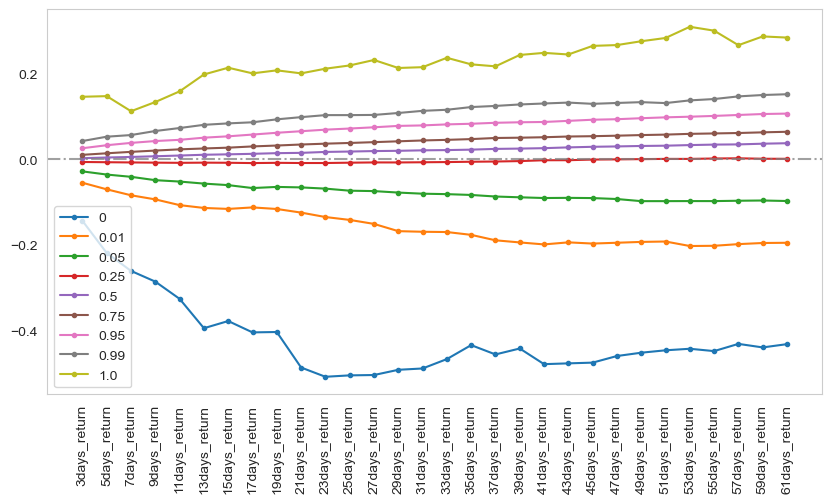

In [154]:
plt.figure(figsize = (10, 5))
plt.plot(
    return_data.quantile([0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0]).T, marker = '.'
)
plt.grid(False)
plt.xticks(rotation = 90)
plt.axhline(0, color = 'gray', ls = '-.', alpha = 0.75)
plt.legend([0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0])
plt.show()

<Axes: >

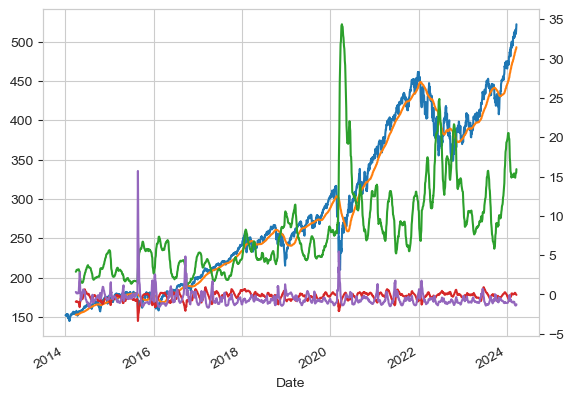

In [155]:
data['Adj Close'].plot()
data['Adj Close'].rolling(window = 60).mean().plot()
data['Adj Close'].rolling(window = 60).std().plot(secondary_y = True)
data['Adj Close'].rolling(window = 60).skew().plot(secondary_y = True)
data['Adj Close'].rolling(window = 60).kurt().plot(secondary_y = True)



<Axes: xlabel='Date'>

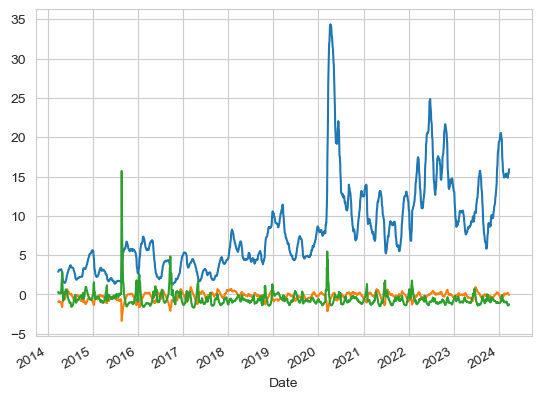

In [156]:
data['Adj Close'].rolling(window = 60).std().plot()
data['Adj Close'].rolling(window = 60).skew().plot()
data['Adj Close'].rolling(window = 60).kurt().plot()

#### Loss Event

In [6]:
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

dataframes = {}
dataframes_plot = {}

days = (i for i in range(3, 62, 2))
threshold = tuple([-i * 0.01 for i in range(3, 21)])

items = [(i, j) for i in days for j in threshold]

In [8]:
for d, thres in tqdm(items) :
    thres = round(-thres * 100, 1)
    dataframes[f'day{d}_{thres}per'] = pd.read_excel(f'../excel/SPY_day{d}_{int(thres)}per.xlsx')

100%|██████████| 540/540 [50:41<00:00,  5.63s/it]  


In [46]:
dataframes['day3_3.0per'].iloc[:,1:].stack().reset_index(drop=True)

0        -0.008419
1        -0.008419
2        -0.008419
3         0.006670
4         0.006670
            ...   
126466    0.019832
126467    0.027595
126468    0.027595
126469    0.027595
126470    0.027595
Length: 126471, dtype: float64

In [12]:
from utils import *
import numpy as np
import pandas as pd

In [63]:
days = [i for i in range(3, 62, 2)]

In [104]:
def statsplot(index, data, thresh) :
    plt.figure(figsize = (8, 8))
    plt.subplot(2, 2, 1)
    plt.plot(
        index, [i.mean() for i in data],
        marker = '.'
    )
    plt.grid(False)
    plt.ylim([-0.05, 0.25])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('mean')
    
    plt.subplot(2, 2, 2)
    plt.plot(
        index, [i.std() for i in data],
        marker = '.'
    )
    plt.grid(False)
    plt.ylim([-0.05, 0.2])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('standard dev')
    
    plt.subplot(2, 2, 3)
    plt.plot(
        index, [i.skew() for i in data],
        marker = '.'
    )
    plt.grid(False)
    plt.ylim([-1, 1])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('skewness')
    
    plt.subplot(2, 2, 4)
    plt.plot(
        index, [i.kurt() for i in data],
        marker = '.'
    )
    plt.grid(False)
    plt.ylim([-1, 2.2])
    plt.axhline(0, color = 'gray', alpha = 0.75, ls = '-.')
    plt.title('kurtosis')
    
    plt.tight_layout()
    
    plt.suptitle(f'sim_thresh : {thresh}% | market : SPY ETF | start : {start_date} | end : {end_date}')
    plt.tight_layout()
    
    filename = f'./figure/SPY_distribution_{thresh}percent.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    return None

In [91]:
def pipeline(threshold, days, dataframes) :
    values = []

    for i in days :
        values.append(
            dataframes[f"day{i}_{threshold}.0per"].iloc[:,1:].stack().reset_index(drop=True)
        )
    
    statsplot(days, values, threshold)
    return None

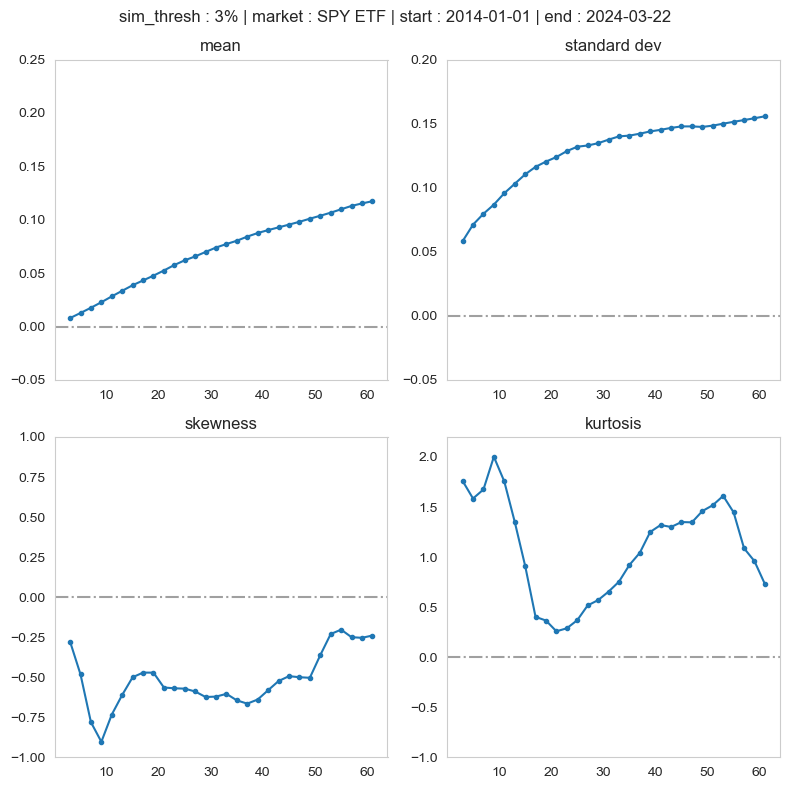

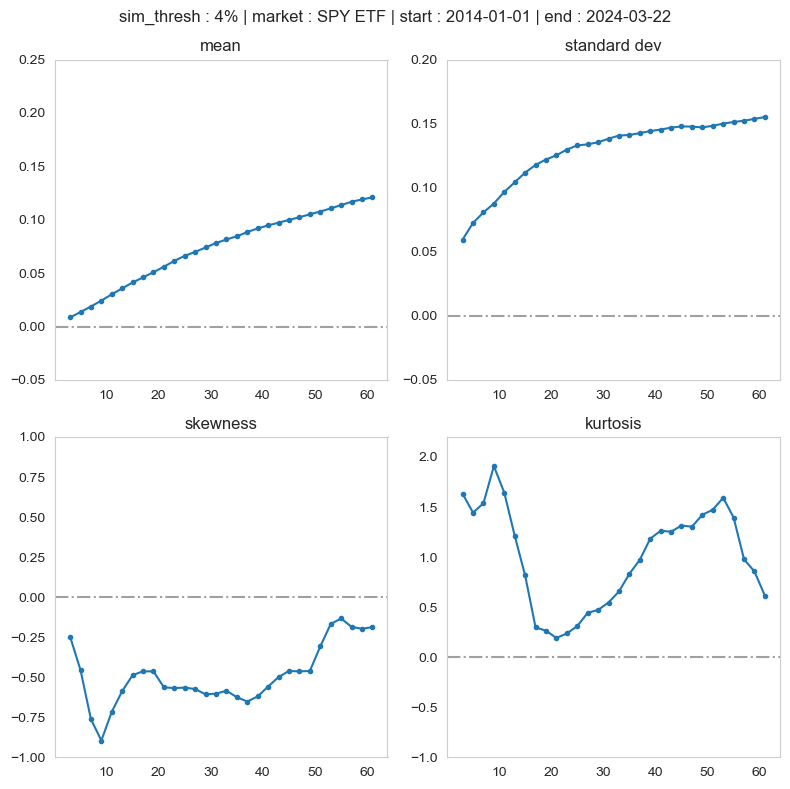

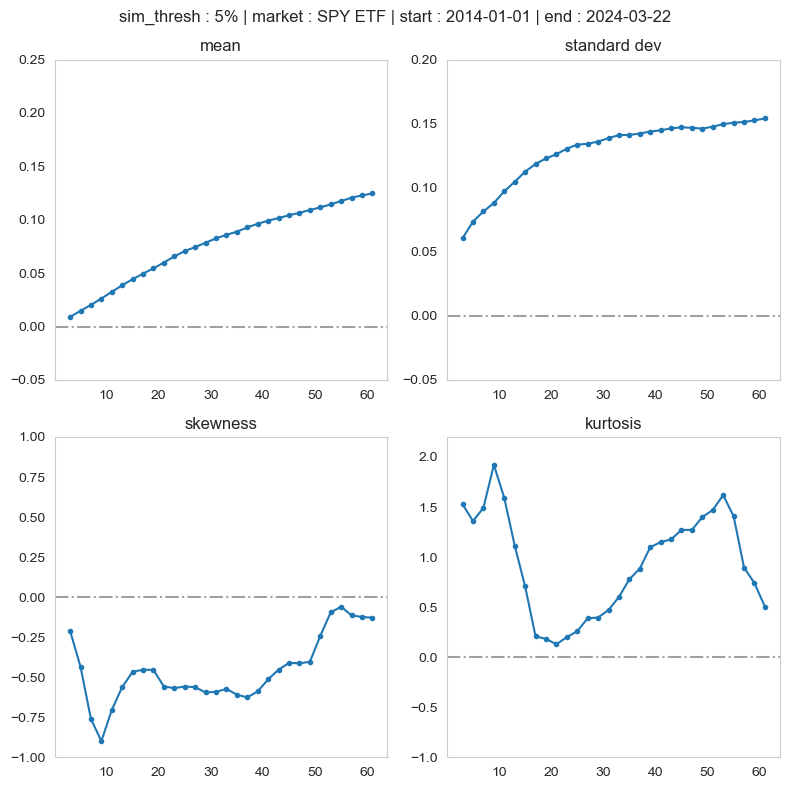

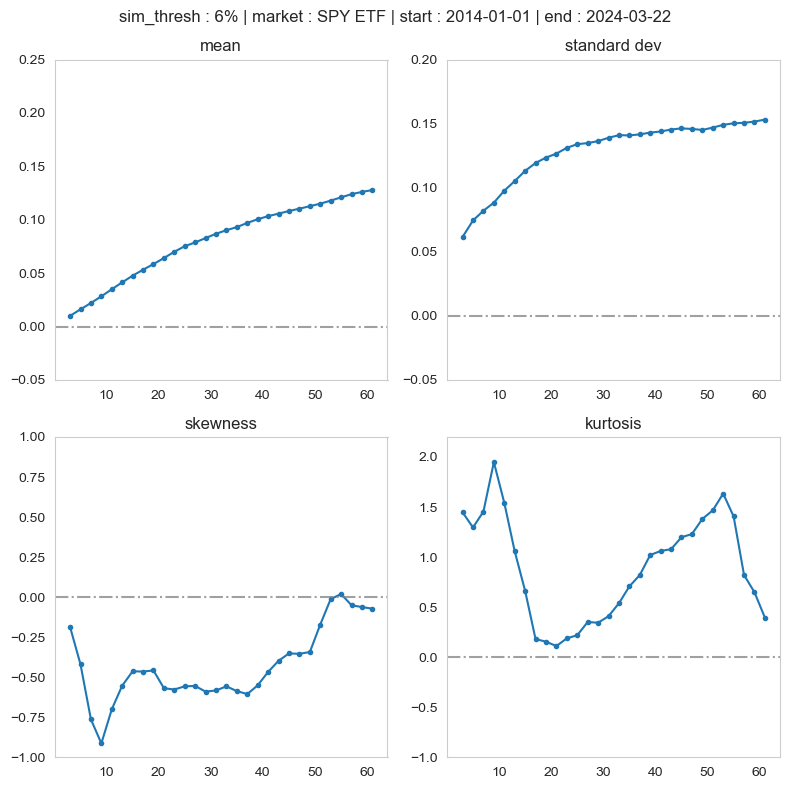

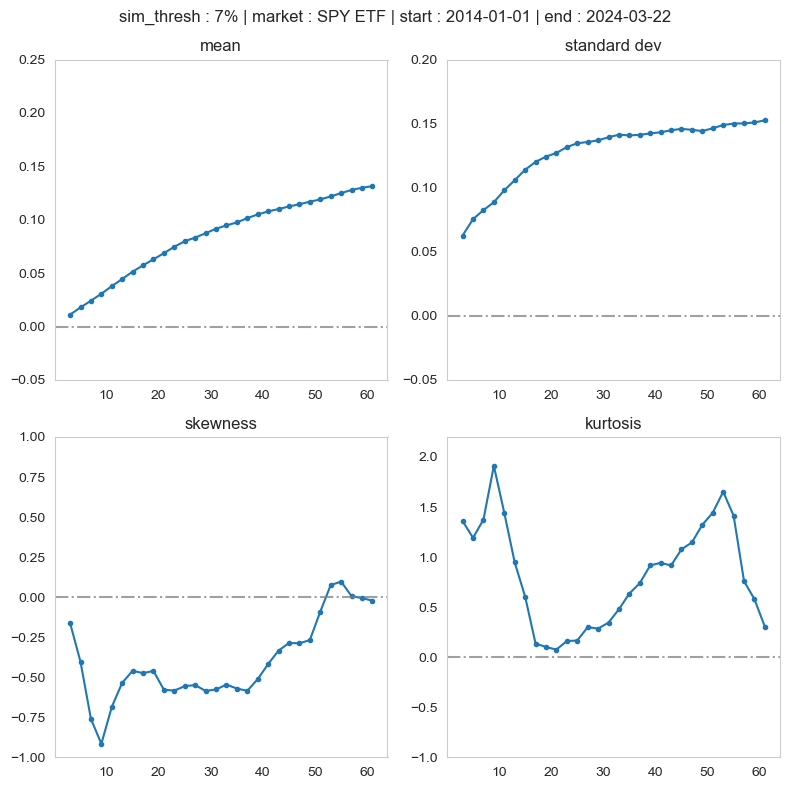

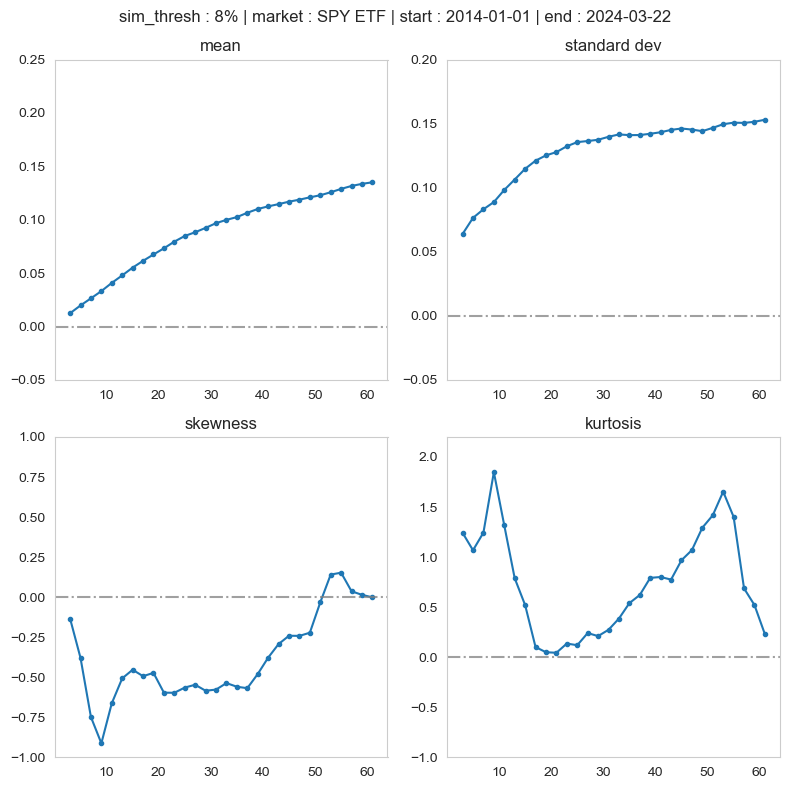

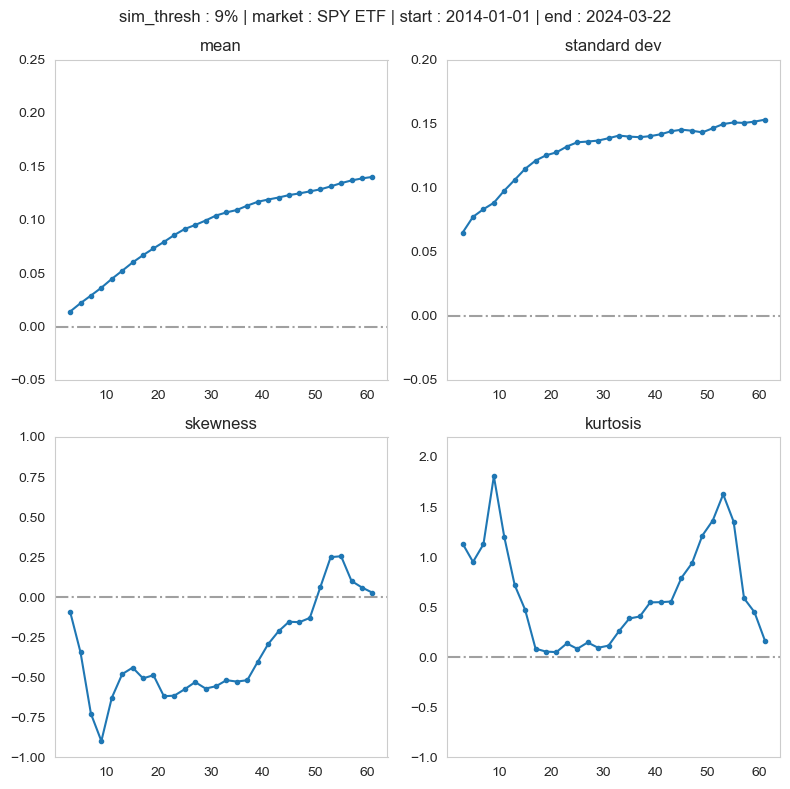

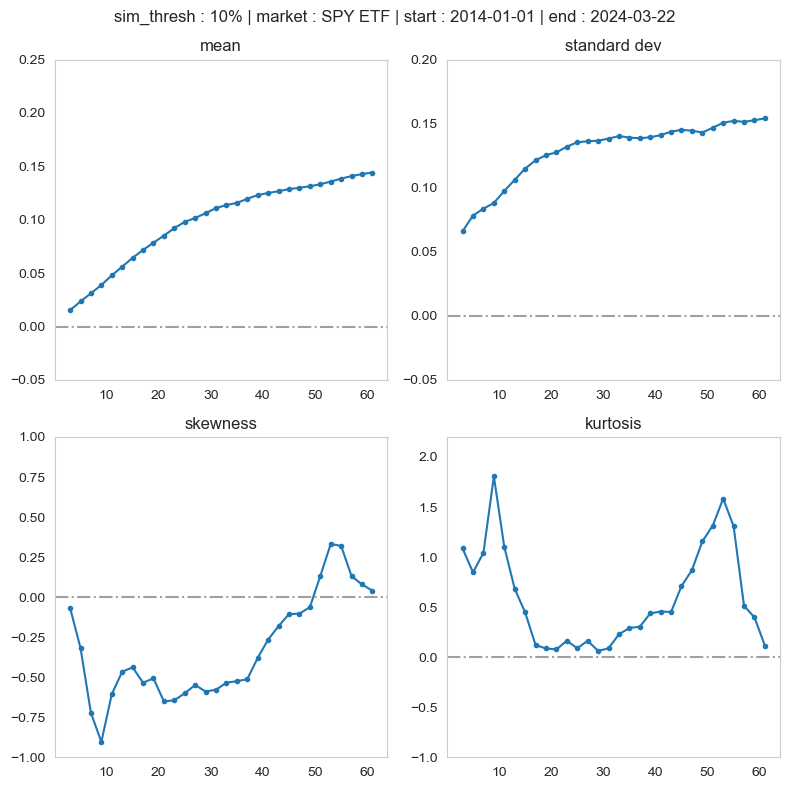

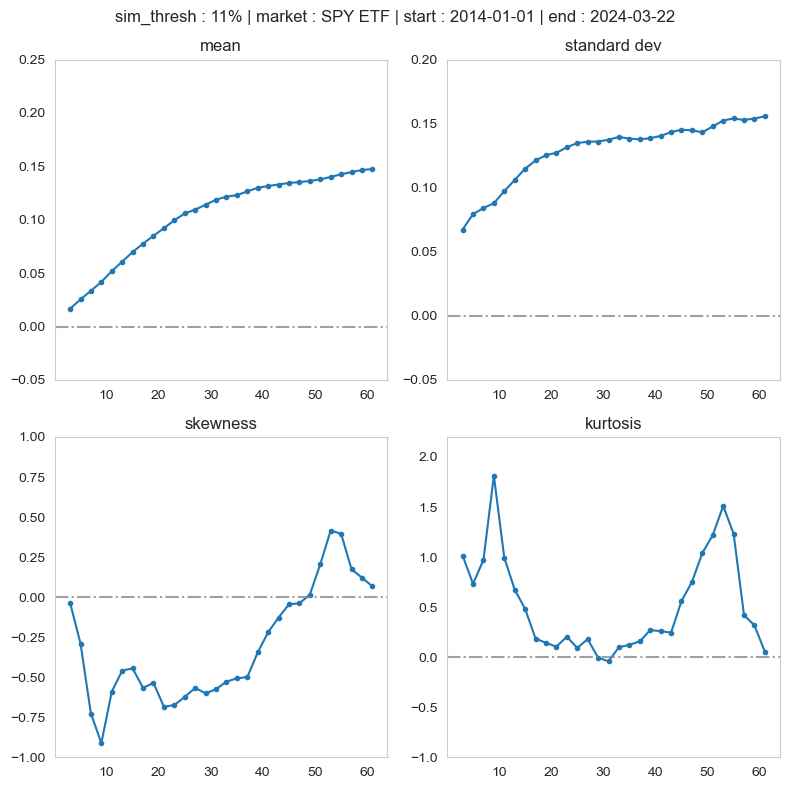

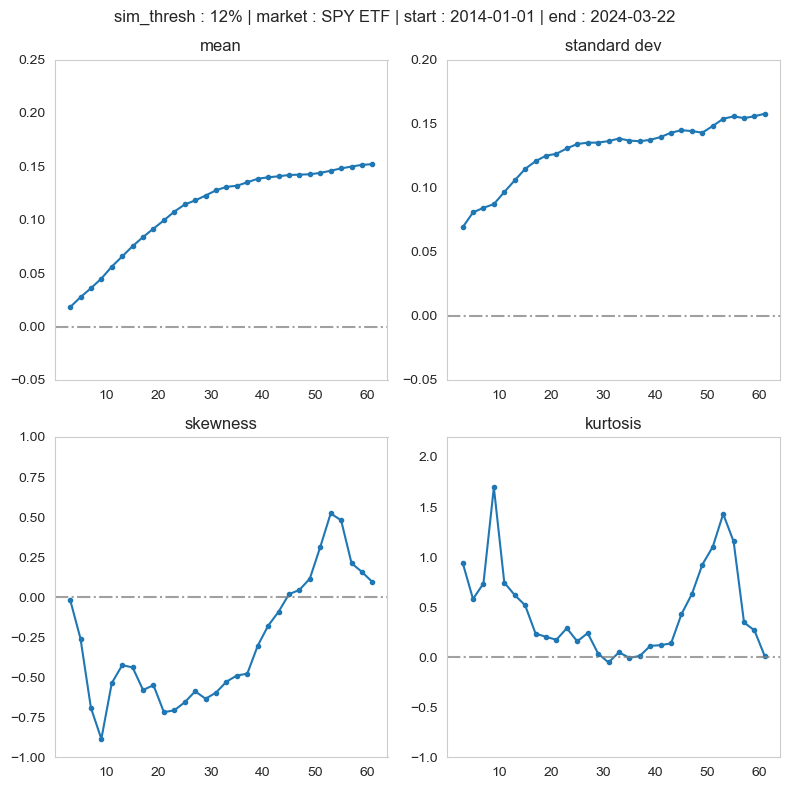

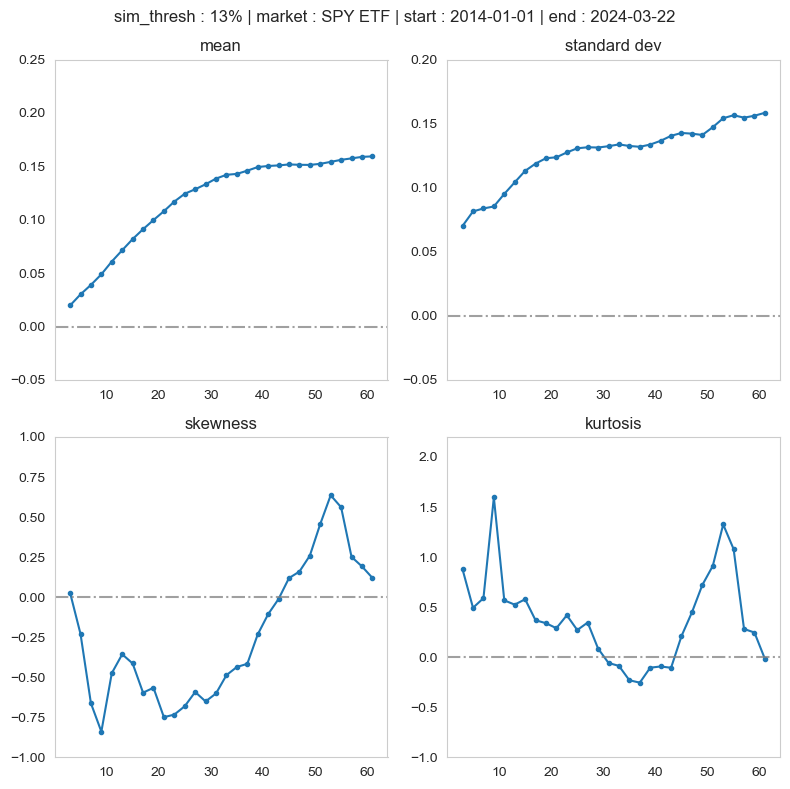

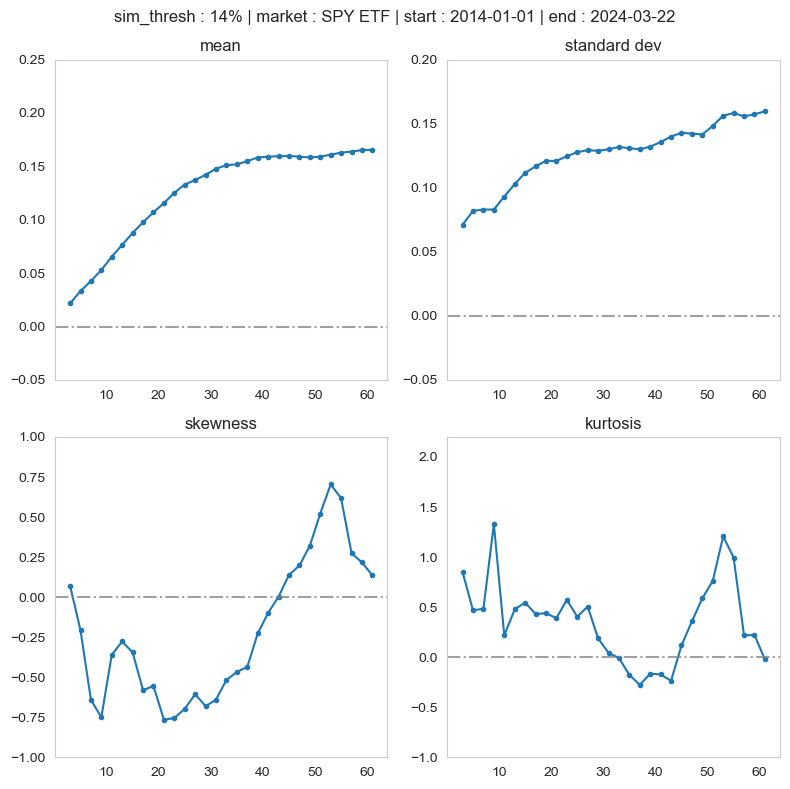

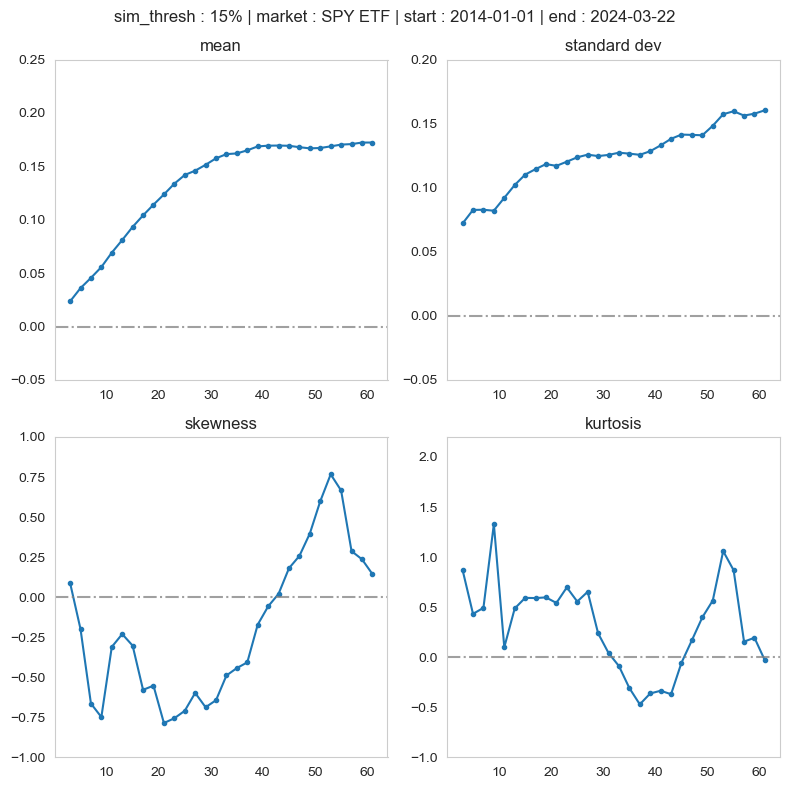

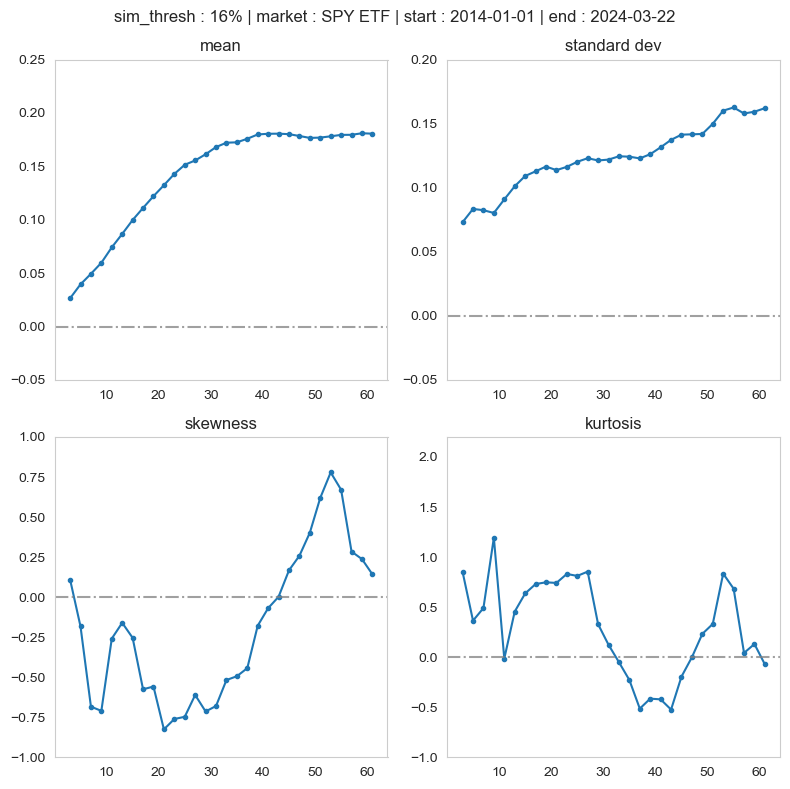

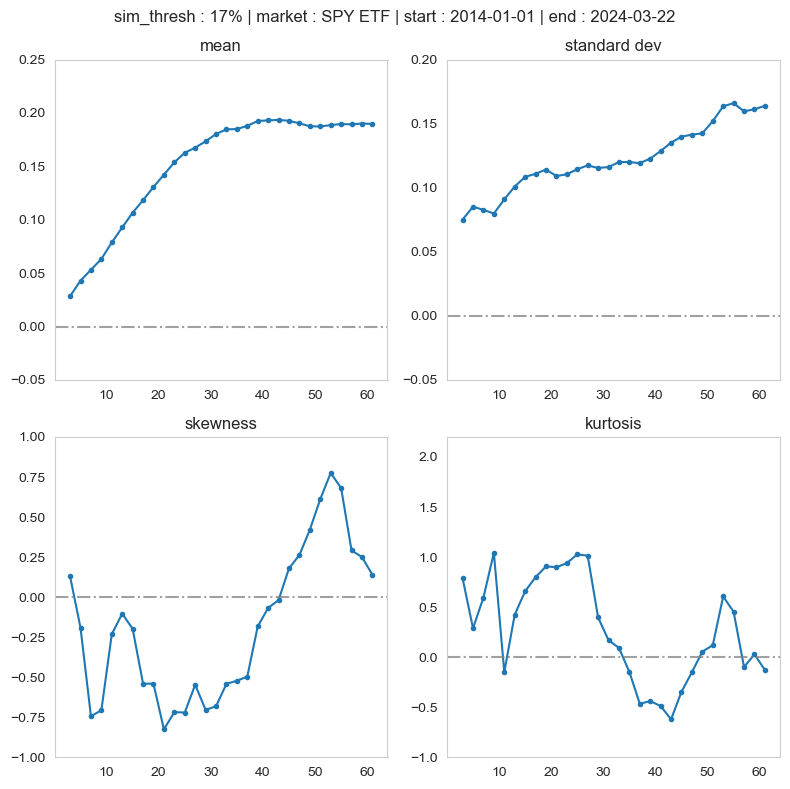

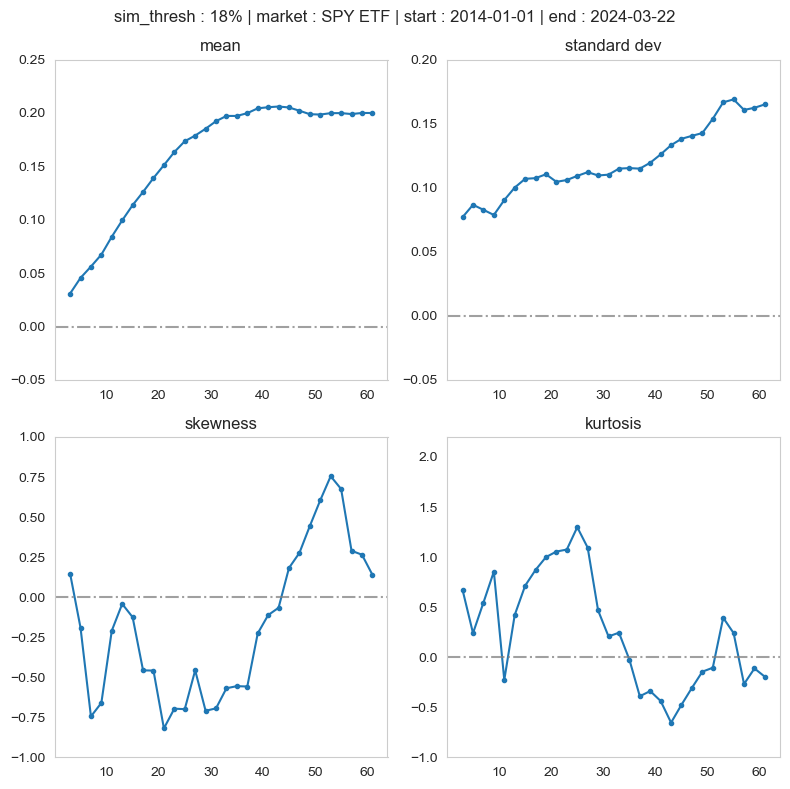

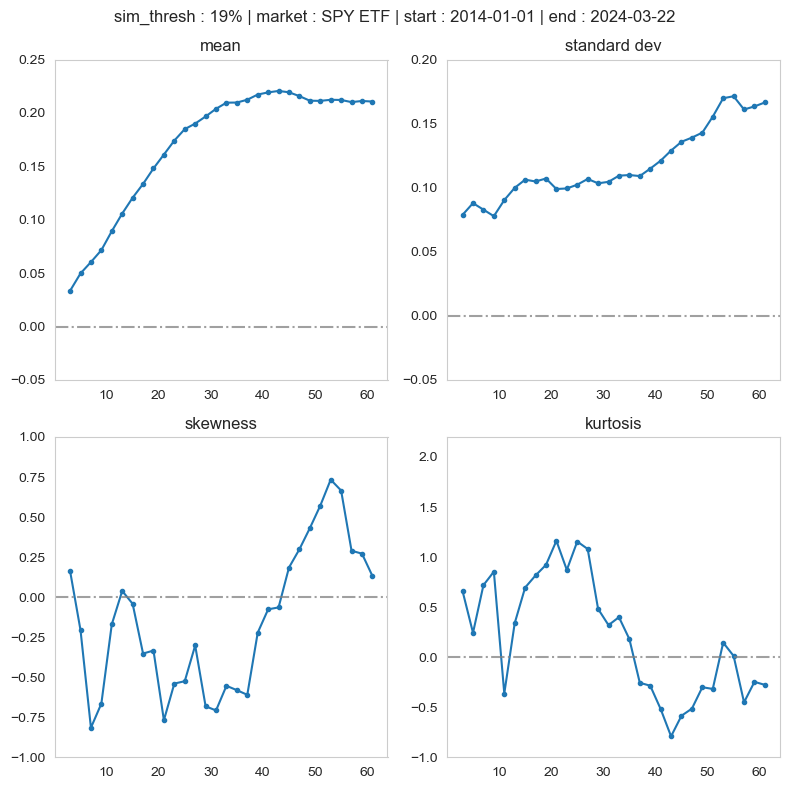

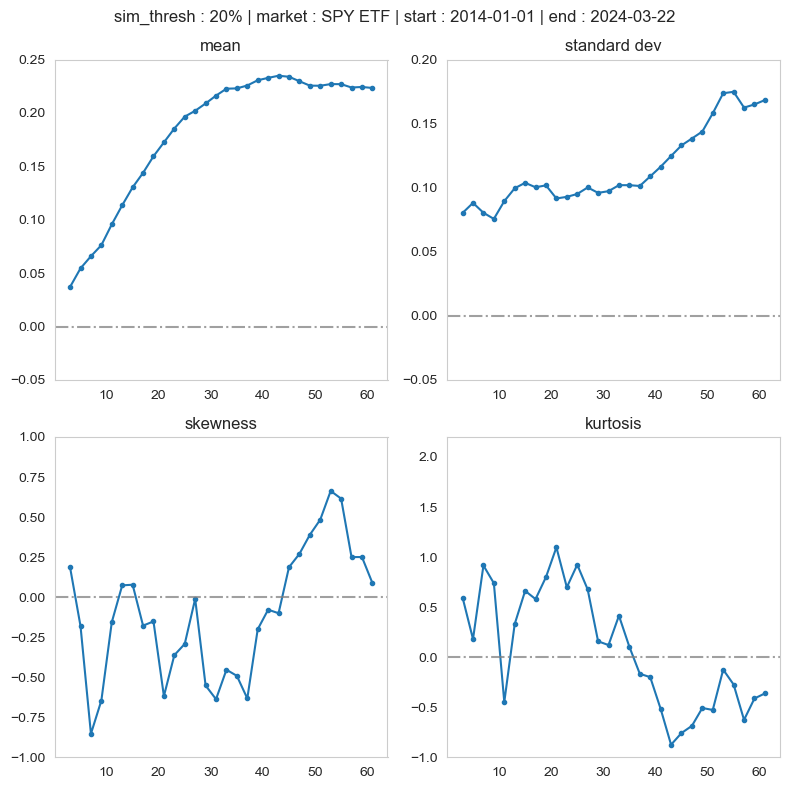

In [214]:
for i in threshold :
    t = -i * 100
    pipeline(int(t), days, dataframes)

In [211]:
from FinancialMachineLearning.backtest.backtest_synthetic_data import *

params = get_OU_params(data['Adj Close']['2021':])

In [212]:
print(f"expected phi : {params['phi'] : .4f}")
print(f"expected forecast : {params['forecast'] : .4f}")
print(f"sigma : {params['sigma'] : .4f}")
print(f"half life : {params['half life'] : .4f}")

expected phi :  0.9939
expected forecast :  6.0263
sigma :  0.0108
half life :  113.9240


In [213]:
rPT = rSLm = np.linspace(0, 10, 41)
coeffs = {'forecast' : params['forecast'], 'hl' : params['half life'], 'sigma' : 1.0}

output = synthetic_simulation(
    coeffs = coeffs, 
    nIter = 1e5, 
    maxHP = 100, 
    rPT = rPT, 
    rSLm = rSLm
)

Total 1681 iterations will be held.


1681it [1:12:53,  2.60s/it]


In [200]:
sr_test = get_sharpe_grid(output, rPT, rSLm)

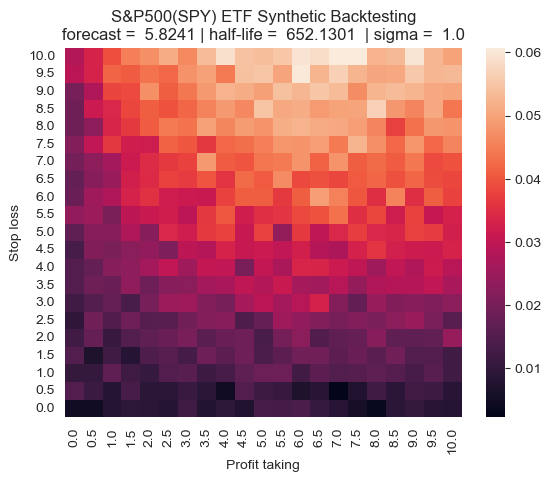

In [201]:
sns.heatmap(sr_test)
plt.title(f"S&P500(SPY) ETF Synthetic Backtesting\nforecast = {coeffs['forecast'] : .4f} | half-life = {coeffs['hl'] : .4f}  | sigma = {coeffs['sigma'] : .1f}")
plt.xlabel("Profit taking")
plt.ylabel("Stop loss")
plt.grid(False)
plt.show()